<a href="https://colab.research.google.com/github/nishanahafsath/Spotify_sentimental_analysis/blob/main/Sentimental_analysis_on_spotiy_reviews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Project Objective and Brief
To develop deep learning algorithms with an aim to detect different types of sentiment contained in a collection of English sentences or a large paragraph and accurately predict the overall sentiment of the paragraph

# Project Guidelines

    Identify and finalize a collection of English sentences or a large paragraph which will also cover contradictory statements.

    Develop a deep learning model for detection & segmentation of sentiments whether positive, negative, or neutral from the paragraph.

    Enhance the previous algorithm to accurately predict the overall sentiment of the paragraph even if it contains contradictory statements.

    Test the model for accuracy

# **Dataset Description**

The dataset contains customer reviews and associated information for the popular music streaming service.The dataset includes attributes such as the time the review was submitted, the text within the review, the rating (1-5), the total thumbs up (how many people thought the review was helpful) and the review reply

In [55]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
import spacy
import string

In [56]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore")

In [57]:
# Load your dataset
df=pd.read_csv("/content/drive/MyDrive/tcs project/reviews.csv")

In [58]:
df

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN
...,...,...,...,...,...
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN


In [59]:
df.head()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
0,2022-07-09 15:00:00,"Great music service, the audio is high quality...",5,2,NaN
1,2022-07-09 14:21:22,Please ignore previous negative rating. This a...,5,1,NaN
2,2022-07-09 13:27:32,"This pop-up ""Get the best Spotify experience o...",4,0,NaN
3,2022-07-09 13:26:45,Really buggy and terrible to use as of recently,1,1,NaN
4,2022-07-09 13:20:49,Dear Spotify why do I get songs that I didn't ...,1,1,NaN


In [60]:
df.tail()

,Time_submitted,Review,Rating,Total_thumbsup,Reply
61589,2022-01-01 03:01:29,Even though it was communicated that lyrics fe...,1,6,NaN
61590,2022-01-01 02:13:40,"Use to be sooo good back when I had it, and wh...",1,0,NaN
61591,2022-01-01 01:02:29,This app would be good if not for it taking ov...,2,10,NaN
61592,2022-01-01 00:49:23,The app is good hard to navigate and won't jus...,2,1,NaN
61593,2022-01-01 00:19:09,Its good but sometimes it doesnt load the musi...,4,0,NaN


In [61]:
df.columns

Index(['Time_submitted', 'Review', 'Rating', 'Total_thumbsup', 'Reply'], dtype='object')

In [62]:
df.shape

(61594, 5)

## EDA

In [63]:
df.describe()

,Rating,Total_thumbsup
count,61594.000000,61594.000000
mean,3.155989,7.649381
std,1.673285,89.323143
min,1.000000,0.000000
25%,1.000000,0.000000
50%,3.000000,0.000000
75%,5.000000,1.000000
max,5.000000,8195.000000


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61594 entries, 0 to 61593
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Time_submitted  61594 non-null  object
 1   Review          61594 non-null  object
 2   Rating          61594 non-null  int64 
 3   Total_thumbsup  61594 non-null  int64 
 4   Reply           216 non-null    object
dtypes: int64(2), object(3)
memory usage: 2.3+ MB


In [65]:
df["Review"].nunique()

61356

In [66]:
df["Rating"].nunique()

5

In [67]:
df["Total_thumbsup"].nunique()

532

In [68]:
df.dtypes

Time_submitted    object
Review            object
Rating             int64
Total_thumbsup     int64
Reply             object
dtype: object

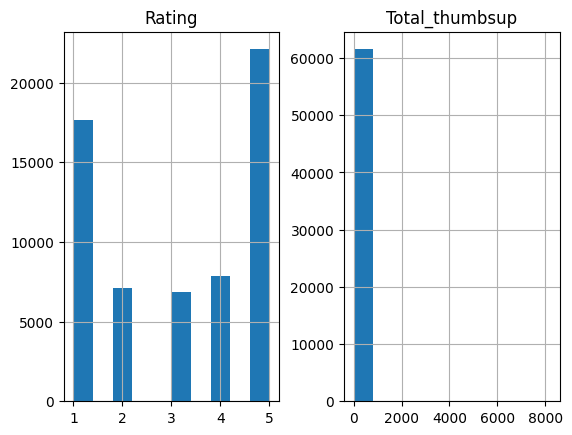

In [69]:
#plotting histogram
df.hist()
plt.show()

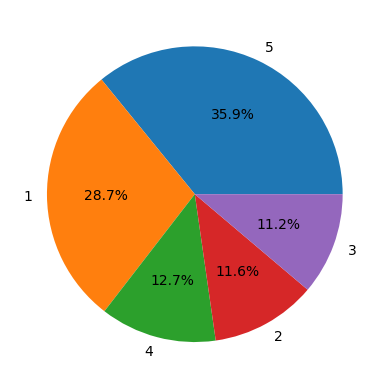

In [70]:
#pie chart  showing the distri=bution of rating

rating_counts = df['Rating'].value_counts()

plt.pie(rating_counts, labels=rating_counts.index, autopct='%1.1f%%')
plt.show()

#   
## Insights:

1.    35.9% % of Spotify reviews have a rating of 5 or 12.7% has rating 4 . This is a very high percentage, suggesting that most users are very satisfied with the product.

2.  11.2% of Spotify reviews have a rating of 3 stars. This suggests that some users have mixed feelings about the product. They may be satisfied with some aspects of the product, but not others.

3. 28.7% of Spotify reviews have a rating of 1 and 11.6% have rating of 2. This suggests that some users are not satisfied with the product. They may have experienced problems with the product, or they may not find it to be meeting their needs.





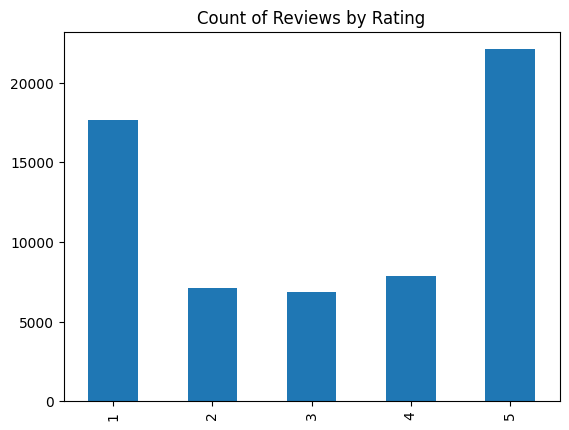

In [71]:
#Count of review by rating graph
ax = df['Rating'].value_counts().sort_index().plot(kind='bar', title='Count of Reviews by Rating')
plt.show()

##Insights:
* Rating 5 has the highest frequency


* Rating 5 typically indicates a highly positive sentiment or satisfaction level


# Data Preprocessing

In [72]:
#Checking for missing values
df.isnull().sum()

Time_submitted        0
Review                0
Rating                0
Total_thumbsup        0
Reply             61378
dtype: int64

In [73]:
df = df.drop(["Reply"], axis=1)

## Feature Reduction

In [74]:
#Droping  irrelevant columns
df = df.drop(["Time_submitted","Total_thumbsup"], axis=1)

In [75]:
x = df[["Review"]]

In [76]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

In [77]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [78]:
# Initialize lemmatizer
lemmatizer = WordNetLemmatizer()

# Lemmatize the 'Review' column
df['Review'] = df['Review'].apply(lambda text: ' '.join([lemmatizer.lemmatize(word) for word in text.split()]))

In [79]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [80]:
 ##download the necessary stopwords
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [81]:
# Define stopwords
stop_words = set(stopwords.words('english'))

# Remove stopwords from the 'Review' column
df['Review'] = df['Review'].apply(lambda text: ' '.join([word for word in text.split() if word.lower() not in stop_words]))


In [82]:
# Define a regular expression pattern for mentions
mention_pattern = r'\S+@\S+|\S+://\S+'

# Remove mentions from the 'Review' column
df['Review'] = df['Review'].apply(lambda text: re.sub(mention_pattern, '', text))

In [83]:
# Define a simple contractions mapping
contractions_mapping = {
    "can't": "cannot",
    "it's": "it is",
    "n't": "not",
    "'s": "is",
    "'re": "are",
    "'ve": "have"
}

# Replace contractions in the 'Review' column
for contraction, expansion in contractions_mapping.items():
    df['Review'] = df['Review'].str.replace(contraction, expansion)

In [84]:
# Convert text in the 'Review' column to lowercase
df['Review'] = df['Review'].str.lower()

#**Sentimental Analysis**

In [85]:
# Download the VADER lexicon
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [86]:
from nltk.sentiment import SentimentIntensityAnalyzer

In [87]:
analyzer = SentimentIntensityAnalyzer()

In [88]:
def categorize_sentiment(review):
    # Analyze the sentiment of the review using VADER
    sentiment_scores = analyzer.polarity_scores(review)

    # Categorize the sentiment based on compound score
    if sentiment_scores['compound'] >= 0.05:
        return 'positive'
    elif sentiment_scores['compound'] <= -0.05:
        return 'negative'
    else:
        return 'neutral'


In [89]:
df['Sentiment'] = df['Review'].apply(categorize_sentiment)

In [90]:
sentiment_counts = df['Sentiment'].value_counts()

# Print the counts
print(sentiment_counts)


positive    43940
negative    12784
neutral      4870
Name: Sentiment, dtype: int64


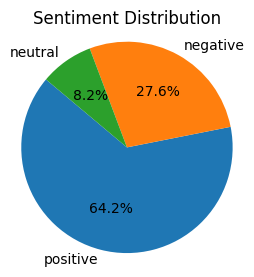

In [91]:
import matplotlib.pyplot as plt


sentiments = ['positive', 'negative', 'neutral']
sentiment_counts = [39562,  17007,5025]  # Replace with the actual counts

# Create a pie chart
plt.figure(figsize=(3, 3))
plt.pie(sentiment_counts, labels=sentiments, autopct='%1.1f%%', startangle=140)
plt.title('Sentiment Distribution')

# Display the chart
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

## Insights:
The sentiment distribution pie chart shows that the majority of Spotify reviews are positive (64.2%), followed by neutral (8.2%) and negative (27.6%).

This suggests that customers are generally satisfied with Spotify. However, there is still room for improvement, as a significant number of reviews are negative

In [92]:
df


,Review,Rating,Sentiment
0,"great music service, audio high quality app ea...",5,positive
1,please ignore previous negative rating. app su...,5,positive
2,"pop-up ""get best spotify experience android 12...",4,positive
3,really buggy terrible use recently,1,negative
4,dear spotify get song put playlist??? shuffle ...,1,positive
...,...,...,...
61589,even though wa communicated lyric feature avai...,1,negative
61590,"use sooo good back it, downloaded (free versio...",1,positive
61591,app would good taking device on. start comp. t...,2,negative
61592,app good hard navigate let play song click pla...,2,positive


In [93]:
# Split the data into training, validation, and test set
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [94]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM,Dense, Dropout, SpatialDropout1D
from tensorflow.keras.layers import Embedding
from nltk.sentiment import SentimentIntensityAnalyzer


In [95]:
# Define and fit the tokenizer
tokenizer = Tokenizer()
tokenizer.fit_on_texts(train_df['Review'])


In [96]:
# Convert sentiment labels to numerical values
sentiment_mapping = {'negative': 0, 'neutral': 1, 'positive': 2}
y_train = train_df['Sentiment'].map(sentiment_mapping)
y_val = val_df['Sentiment'].map(sentiment_mapping)
y_test = test_df['Sentiment'].map(sentiment_mapping)

In [97]:
# Define model parameters
vocab_size = len(tokenizer.word_index) + 1
embedding_dim = 100
max_seq_length = 200

In [98]:
# Convert text to sequences
X_train = pad_sequences(tokenizer.texts_to_sequences(train_df['Review']), maxlen=max_seq_length)
X_val = pad_sequences(tokenizer.texts_to_sequences(val_df['Review']), maxlen=max_seq_length)
X_test = pad_sequences(tokenizer.texts_to_sequences(test_df['Review']), maxlen=max_seq_length)

In [99]:
# Define the model
model = Sequential()
model.add(Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=max_seq_length))
model.add(LSTM(units=100))
model.add(Dense(units=3, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [100]:
# Train the model
batch_size = 64
epochs = 10

history = model.fit(X_train, y_train, batch_size=batch_size, epochs=epochs, validation_data=(X_val, y_val))

Epoch 1/10
770/770 [==============================] - 332s 427ms/step - loss: 0.4227 - accuracy: 0.8407 - val_loss: 0.3088 - val_accuracy: 0.8906
Epoch 2/10
770/770 [==============================] - 331s 431ms/step - loss: 0.2431 - accuracy: 0.9183 - val_loss: 0.2749 - val_accuracy: 0.9068
Epoch 3/10
770/770 [==============================] - 334s 433ms/step - loss: 0.1737 - accuracy: 0.9426 - val_loss: 0.2579 - val_accuracy: 0.9123
Epoch 4/10
770/770 [==============================] - 336s 437ms/step - loss: 0.1260 - accuracy: 0.9588 - val_loss: 0.2697 - val_accuracy: 0.9174
Epoch 5/10
770/770 [==============================] - 335s 435ms/step - loss: 0.1019 - accuracy: 0.9671 - val_loss: 0.2784 - val_accuracy: 0.9178
Epoch 6/10
770/770 [==============================] - 331s 430ms/step - loss: 0.0817 - accuracy: 0.9733 - val_loss: 0.3085 - val_accuracy: 0.9144
Epoch 7/10
770/770 [==============================] - 332s 431ms/step - loss: 0.0663 - accuracy: 0.9774 - val_loss: 0.3295 -

In [101]:

# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_accuracy:.4f}')

193/193 [==============================] - 11s 55ms/step - loss: 0.4386 - accuracy: 0.9106
Test accuracy: 0.9106


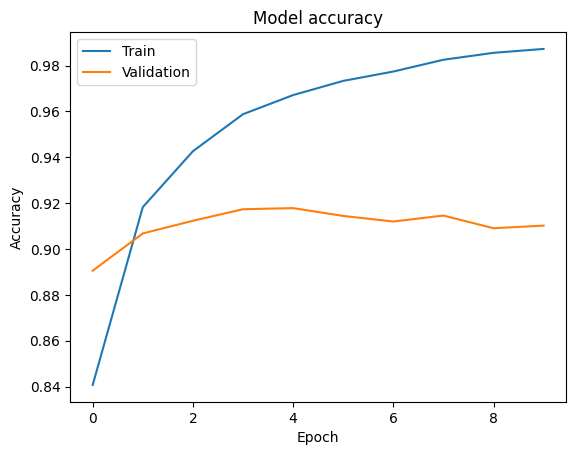

In [102]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

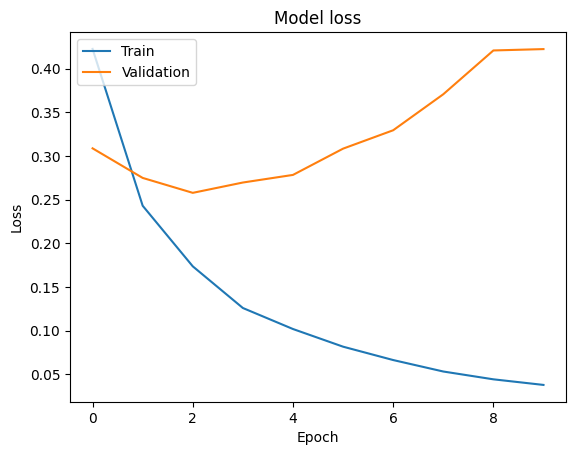

In [103]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [104]:
def predict_sentiment(text, model, tokenizer, max_seq_length):
    # Tokenize and preprocess the input text
    text = [text]
    inputs = pad_sequences(tokenizer.texts_to_sequences(text), maxlen=max_seq_length)

    # Make predictions
    predictions = model.predict(inputs)

    # Get the predicted sentiment label (positive, neutral, or negative)
    sentiment_labels = ['negative', 'neutral', 'positive']
    predicted_sentiment = sentiment_labels[np.argmax(predictions)]

    return predicted_sentiment


In [105]:
text_to_predict = "I really enjoyed the new album on Spotify!"
predicted_sentiment = predict_sentiment(text_to_predict, model, tokenizer, max_seq_length)
print(f"Predicted sentiment: {predicted_sentiment}")

1/1 [==============================] - 0s 418ms/step
Predicted sentiment: positive


In [106]:
text_to_predict = "Can't play Spotify when on WiFi"
predicted_sentiment = predict_sentiment(text_to_predict, model, tokenizer, max_seq_length)
print(f"Predicted sentiment: {predicted_sentiment}")

1/1 [==============================] - 0s 44ms/step
Predicted sentiment: negative


In [107]:
text_to_predict = "An amazing music experience"
predicted_sentiment = predict_sentiment(text_to_predict, model, tokenizer, max_seq_length)
print(f"Predicted sentiment: {predicted_sentiment}")

1/1 [==============================] - 0s 54ms/step
Predicted sentiment: positive


In [108]:
text_to_predict = "Worst app always says I'm offline and never showed any song or podcast"
predicted_sentiment = predict_sentiment(text_to_predict, model, tokenizer, max_seq_length)
print(f"Predicted sentiment: {predicted_sentiment}")

1/1 [==============================] - 0s 58ms/step
Predicted sentiment: negative


In [109]:
text_to_predict = "Worst app always"
predicted_sentiment = predict_sentiment(text_to_predict, model, tokenizer, max_seq_length)
print(f"Predicted sentiment: {predicted_sentiment}")

1/1 [==============================] - 0s 52ms/step
Predicted sentiment: negative


In [110]:
text_to_predict = "ok"
predicted_sentiment = predict_sentiment(text_to_predict, model, tokenizer, max_seq_length)
print(f"Predicted sentiment: {predicted_sentiment}")

1/1 [==============================] - 0s 93ms/step
Predicted sentiment: positive


In [111]:
text_to_predict = "nice app"
predicted_sentiment = predict_sentiment(text_to_predict, model, tokenizer, max_seq_length)
print(f"Predicted sentiment: {predicted_sentiment}")

1/1 [==============================] - 0s 47ms/step
Predicted sentiment: positive
